In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [48]:
df = pd.read_csv("collisions_cleaned.csv", low_memory=False)

In [99]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
0,03/24/2017,0:00,BRONX,10458.0,40.866047,-73.882744,"(40.866047,-73.882744)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,17614.0,0.093326,40.87,-73.88
1,03/24/2017,0:00,BROOKLYN,11220.0,40.633470,-74.021020,"(40.63347,-74.02102)",BAY RIDGE AVENUE,5 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN,3659.0,0.149753,40.63,-74.02
2,03/24/2017,0:00,BROOKLYN,11222.0,40.728416,-73.952415,"(40.728416,-73.952415)",CALYER STREET,LEONARD STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3638289,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,33440.0,0.016386,40.73,-73.95
3,03/24/2017,0:00,QUEENS,11104.0,40.748928,-73.913750,"(40.748928,-73.91375)",50 STREET,39 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638133,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,6428.0,0.255730,40.75,-73.91
4,03/24/2017,0:00,QUEENS,11354.0,40.766445,-73.834040,"(40.766445,-73.83404)",33 AVENUE,MILLER STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638189,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,5054.0,0.108418,40.77,-73.83


In [134]:
even_rush_hour = df[df['TIME'] >= '16:00']
even_rush_hour = even_rush_hour[even_rush_hour['TIME'] <= '19:00']
morn_rush_hour = df[df['TIME'] >= '07:00']
morn_rush_hour = morn_rush_hour[morn_rush_hour['TIME'] <= '09:00']

In [137]:
rush_hour = df[df['TIME'] >= '16:00']
rush_hour = rush_hour[rush_hour['TIME'] <= '19:00']

In [139]:
rush_hour.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
173,03/24/2017,16:00,BROOKLYN,11230.0,40.627155,-73.96563,"(40.627155,-73.96563)",CONEY ISLAND AVENUE,AVENUE I,NaN,0,0,0,0,0,0,0,0,Reaction to Other Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,3638672,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,10609.0,0.361544,40.63,-73.97
174,03/24/2017,16:00,MANHATTAN,10036.0,40.755318,-73.98524,"(40.755318,-73.98524)",NaN,NaN,135 WEST 42 STREET,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3639122,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN,10373.0,0.052824,40.76,-73.99
175,03/24/2017,16:00,QUEENS,11432.0,40.708138,-73.80303,"(40.708138,-73.80303)",HIGHLAND AVENUE,PARSONS BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3638246,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,7674.0,0.071403,40.71,-73.80
176,03/24/2017,16:00,BROOKLYN,11214,40.584038,-73.98534,"(40.584038,-73.98534)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638747,PICK-UP TRUCK,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,14431.0,0.037970,40.58,-73.99
177,03/24/2017,16:00,BRONX,10469,40.856380,-73.83329,"(40.85638,-73.83329)",NaN,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3639106,PICK-UP TRUCK,NaN,NaN,NaN,NaN,411.0,2.666400,40.86,-73.83


In [ ]:
norm_hour = df[df['TIME'] <= '16:00']
norm_hour = norm_hour[rush_hour['TIME'] >= '19:00']

In [140]:
manhattan = rush_hour[rush_hour['BOROUGH'] == 'MANHATTAN']
manhattan = manhattan.drop_duplicates(subset='LOCATION')
num_of_coll = len(manhattan)
tot_traffic = manhattan['Counts'].sum()
time = 365*5

In [141]:
prob_manhattan = len(manhattan)/(tot_traffic*time)
print(prob_manhattan)

3.7902425609456396e-08


In [142]:
brooklyn = rush_hour[rush_hour['BOROUGH'] == 'BROOKLYN']
brooklyn = brooklyn.drop_duplicates(subset='LOCATION')
num_of_coll = len(brooklyn)
tot_traffic = brooklyn['Counts'].sum()
time = 365*5

In [143]:
prob_brooklyn = len(brooklyn)/(tot_traffic*time)
print(prob_brooklyn)

4.259563538814495e-08


In [144]:
bronx = rush_hour[rush_hour['BOROUGH'] == 'BRONX']
bronx = bronx.drop_duplicates(subset='LOCATION')
num_of_coll = len(bronx)
tot_traffic = bronx['Counts'].sum()
time = 365*5

In [145]:
prob_bronx = len(bronx)/(tot_traffic*time)
print(prob_bronx)

4.60902818934893e-08


In [146]:
queens = rush_hour[rush_hour['BOROUGH'] == 'QUEENS']
queens = queens.drop_duplicates(subset='LOCATION')
num_of_coll = len(queens)
tot_traffic = queens['Counts'].sum()
time = 365*5

In [147]:
prob_queens = len(queens)/(tot_traffic*time)
print(prob_queens)

4.0832441368093595e-08


In [148]:
staten_island = rush_hour[rush_hour['BOROUGH'] == 'STATEN ISLAND']
staten_island = staten_island.drop_duplicates(subset='LOCATION')
num_of_coll = len(staten_island)
tot_traffic = staten_island['Counts'].sum()
time = 365*5

In [149]:
prob_staten_island = len(staten_island)/(tot_traffic*time)
print(prob_staten_island)

4.975444880979757e-08


In [150]:
probs = [prob_manhattan,prob_brooklyn,prob_bronx,prob_queens,prob_staten_island]

In [151]:
prob_factor = 1/sum(probs)

In [152]:
probs = [x*prob_factor for x in probs]

In [153]:
ticks = ['Manhattan','Brooklyn','Bronx','Queens','Staten Island']

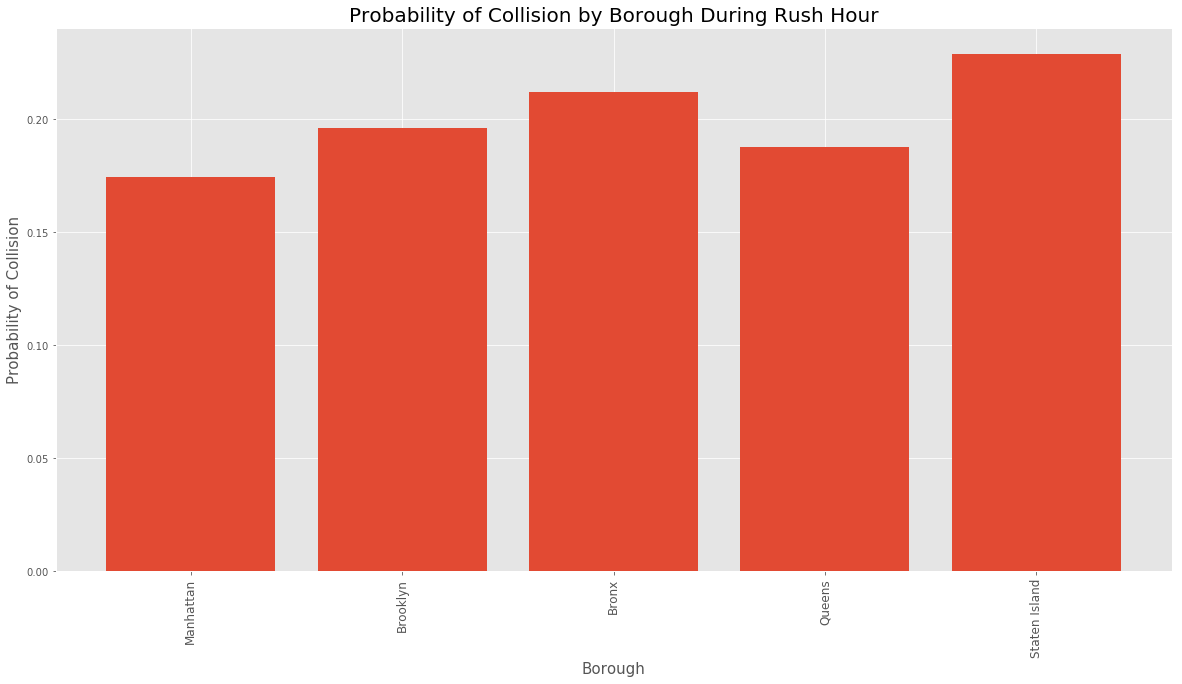

In [154]:
plt.bar(range(len(probs)), probs, align='center')
plt.xticks(range(len(probs)), ticks, size='large', rotation='vertical')
plt.title('Probability of Collision by Borough During Rush Hour', size=20)
plt.xlabel('Borough', size=15)
plt.ylabel('Probability of Collision', size=15)
plt.show()